# Efficent Frontier

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import edhec_risk_kit as erk

%load_ext autoreload
%autoreload 2

In [2]:
data = pd.read_csv('ind30_m_vw_rets.csv',
           index_col = 0,
           parse_dates = True)

In [3]:
idx = data/100
idx.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
192607,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
192608,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
192609,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
192610,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
192611,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400


In [4]:
idx.index = pd.to_datetime(idx.index, format = '%Y%m').to_period('M')

In [5]:
columns = [column.replace(' ','') for column in list(idx.columns)]

In [6]:
idx.columns = columns
idx.columns

Index(['Food', 'Beer', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth',
       'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
       'Mines', 'Coal', 'Oil', 'Util', 'Telcm', 'Servs', 'BusEq', 'Paper',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin', 'Other'],
      dtype='object')

<AxesSubplot:title={'center':'Food Drawdown'}>

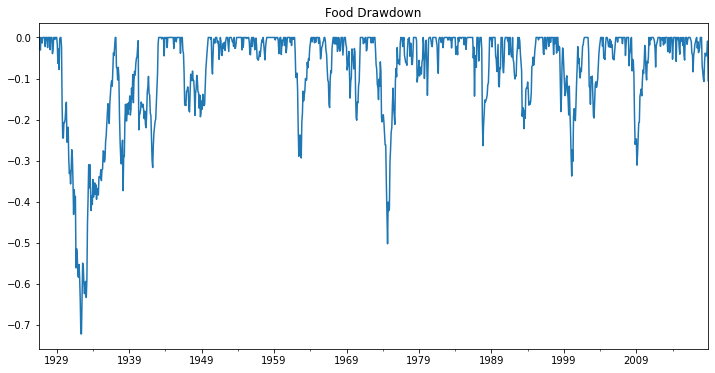

In [7]:
erk.computeDrawdown(idx, 'Food')['drawdown'].plot(title = 'Food Drawdown', figsize = (12,6))

In [8]:
erk.gussianVar(idx, modified = True).sort_values().tail()

Autos    0.119941
Servs    0.124616
Steel    0.129697
Games    0.135309
Coal     0.167033
dtype: float64

In [9]:
erk.gussianVar(idx, modified = True).sort_values().head()

Telcm    0.067026
Food     0.068226
Hlth     0.080671
Util     0.081711
Smoke    0.084150
dtype: float64

<AxesSubplot:>

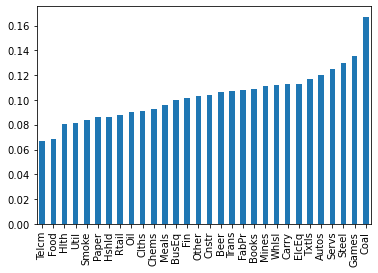

In [10]:
erk.gussianVar(idx, modified = True).sort_values().plot(kind = 'bar')

In [11]:
erk.annualized_return(idx)

Food     0.106649
Beer     0.120041
Smoke    0.122324
Games    0.091829
Books    0.079147
Hshld    0.093513
Clths    0.093518
Hlth     0.116723
Chems    0.107320
Txtls    0.083356
Cnstr    0.086209
Steel    0.067926
FabPr    0.098153
ElcEq    0.109179
Autos    0.094397
Carry    0.107120
Mines    0.075994
Coal     0.062543
Oil      0.101700
Util     0.090147
Telcm    0.092669
Servs    0.109196
BusEq    0.112490
Paper    0.106115
Trans    0.084093
Whlsl    0.067420
Rtail    0.107438
Meals    0.106644
Fin      0.098169
Other    0.068767
dtype: float64

In [12]:
erk.annualized_volitility(idx)

Food     0.163974
Beer     0.248922
Smoke    0.201206
Games    0.308881
Books    0.247850
Hshld    0.200962
Clths    0.210732
Hlth     0.192703
Chems    0.218022
Txtls    0.265996
Cnstr    0.238219
Steel    0.292022
FabPr    0.249735
ElcEq    0.262667
Autos    0.275035
Carry    0.262226
Mines    0.252297
Coal     0.373938
Oil      0.211075
Util     0.190571
Telcm    0.159056
Servs    0.288004
BusEq    0.233885
Paper    0.202983
Trans    0.244961
Whlsl    0.253232
Rtail    0.206729
Meals    0.224011
Fin      0.234825
Other    0.234123
dtype: float64

In [14]:
erk.sharpe_ratio(idx, 12)

Food     0.467446
Beer     0.361724
Smoke    0.458854
Games    0.200171
Books    0.198294
Hshld    0.316044
Clths    0.301416
Hlth     0.450033
Chems    0.354643
Txtls    0.200591
Cnstr    0.235955
Steel    0.129874
FabPr    0.272901
ElcEq    0.301443
Autos    0.234140
Carry    0.294098
Mines    0.182302
Coal     0.087027
Oil      0.339688
Util     0.315616
Telcm    0.394008
Servs    0.274983
BusEq    0.352694
Paper    0.374984
Trans    0.220822
Whlsl    0.147769
Rtail    0.374587
Meals    0.342145
Fin      0.290296
Other    0.165584
dtype: float64